In [3]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [5]:
# we now create an AgentState - shared data structure that keeps track of information as your application runs. 

class AgentState(TypedDict): # our state schema
    message: str


def greeting_node(state: AgentState) -> AgentState:
    """
    Simple node that adds a greeting message to the state.
    """
    state["message"] = f"Hello {state['message']}, how is your day going"
    return state

In [6]:
graph = StateGraph(AgentState)

graph.add_node("greeting_node", greeting_node)

graph.set_entry_point("greeting_node")
graph.set_finish_point("greeting_node")

app = graph.compile()

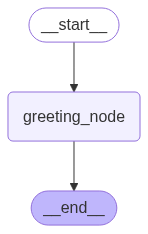

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
result = app.invoke({"message": "Sunil"})

{'message': 'Hello Sunil, how is your day going'}